```{include} ../math-definitions.md
```

In [1]:
import bccr
import numpy as np
import pandas as pd
pd.options.plotting.backend = "plotly"
import matplotlib.pyplot as plt
import statsmodels.api as sm

plt.style.use('seaborn')

# Modelos de series con tendencia

## Series integradas

A las series que tienen tendencia se les conoces como **series integradas**. ¿Pero por qué integradas?

Supongamos por un momento que $y(t)$ es una variable cuyo valor depende del momento $t$ (continuo) en que se observa. Supongamos también que $y$ cambia a una tasa constante $a$ y que su valor inicial es $y(0)$. ¿A qué es igual $y(t)$?

De los supuestos anteriores:
\begin{align*}
\frac{\dd y}{\dd\tau} &= a\\
                \dd y &= a\dd\tau
\end{align*}

integrando ambos lados
\begin{align*}
\int_0^t \dd y &= \int_0^t a\dd\tau \\
\left. y(\tau)\right|_{0}^{t} &= \left. a\tau\right|_{0}^{t} \\
y(t) - y(0) &= at \\
\end{align*}

por lo tanto
\begin{align*}
y(t) &= y(0) + at
\end{align*}


Supongamos ahora que el tiempo se mide en unidades discretas, que el valor inicial es $y_0$ y que la variable crece una cantidad fija $a$ cada período. Entonces
\begin{align*}
\Delta y_\tau &= a \notationbrace{\Delta\tau}{=1} = a
\end{align*}

integrando ambos lados

\begin{align*}
\sum_{\tau=1}^t \Delta y_\tau &= \sum_{\tau=1}^t a \\
\notation{\Delta y_1}{$y_1-y_0$} + \notation{\Delta y_2}{$y_2-y_1$} + \notation{\Delta y_3}{$y_3-y_2$} + \dots + \notation{\Delta y_t}{$y_t-y_{t-1}$} &= at \\
y_t - y_0 &= at \\
\end{align*}

por lo tanto

\begin{align*}
y_t &= y_0 + at
\end{align*}

Este resultado lo podemos obtener de manera equivalente con el operador de rezagos:
\begin{align*}
\Delta y_\tau &= a\\
\left(1+\Lag + \Lag^2+\dots+\Lag^{t-1}\right)\Delta y_t &=\left(1+\Lag + \Lag^2+\dots+\Lag^{t-1}\right)a\\
\left(1+\Lag + \Lag^2+\dots+\Lag^{t-1}\right)\left(1-\Lag\right)y_t &=\notationbrace{a + a +\dots+ a}{$t$ veces}\\
\left(1-\Lag^t\right)y_t &=at\\
y_t - y_0 &= at
\end{align*}

Vemos que si $\Delta y_t = a$, es decir, la serie \textbf{cambia una cantidad fija} $a$ cada período, entonces  $y_t = y_0 + at $ tiene una **tendencia determinística**.


Supongamos en contraposición que el **valor esperado del cambio** es constante, en particular
\begin{equation*}
\Delta y_\tau = a + \epsilon_{\tau}
\end{equation*}
donde $\epsilon_{\tau}$ es ruido blanco.

Entonces, integrando
\begin{align*}
\sum_{\tau=1}^t \Delta y_\tau &= \sum_{\tau=1}^t\left(a + \epsilon_{\tau}\right) \\
                    y_t - y_0 &= at + \sum_{\tau=1}^t \epsilon_{\tau} \\
              \Rightarrow y_t &= \left(y_0 + \sum_{\tau=1}^t \epsilon_{\tau}\right) + at
\end{align*}

Decimos que la serie tiene una **tendencia estocástica**.



## Tendencias determinísticas versus estocásticas
```{figure} ./figures/tipos-tendencias.png
```





## Tendencias cuadráticas

Es sencillo generalizar el procedimiento para obtener tendencias cuadráticas.

Si el cambio en la serie es lineal en vez de constante:
\begin{align*}
\Delta y_\tau &= a + b\tau\\
\sum_{\tau=1}^t\Delta y_\tau &= \sum_{\tau=1}^t\left(a + b\tau\right) = at + b\sum_{\tau=1}^t \tau\\
  y_t - y_0  &= at + b\tfrac{t(t+1)}{2} \\
 y_t &= y_0 + \tfrac{2a+b}{2}t + \tfrac{b}{2}t^2
\end{align*}

Es fácil de mostrar que si el cambio es aleatorio $\Delta y_\tau = a + b\tau + \epsilon_{\tau}$ entonces
\begin{equation*}
y_t = \left(y_0 + \sum_{\tau=1}^t \epsilon_{\tau}\right) + \tfrac{2a+b}{2}\,t + \tfrac{b}{2}\,t^2
\end{equation*}







## Serie estacionaria alrededor de una tendencia (TS)

Supongamos que $\omega_t=A(\Lag)\epsilon_t$ es una serie estacionaria, tal que
\begin{align*}
\E\omega_t&=0 & \Var\omega_t&=\sigma^2_\omega
\end{align*}

Definimos una serie

```{admonition} estacionaria alrededor de una tendencia
\begin{equation*}
y_t = \notationbrace{y_0 + at}{tendencia} + \notationbrace{\omega_t}{estacionario}
\end{equation*}
```

Vemos que
\begin{align*}
\E y_t&= y_0 + at & \Var y_t&=\sigma^2_\omega
\end{align*}

Por otra parte, su autocovarianza es:
\begin{align*}
\Cov\left(y_t, y_{t-s}\right) &= \E\left[(y_t-y_0-at)(y_{t-s}-y_0-a(t-s))\right]\\
                             	&=\E\left[\omega_t \omega_{t-s}\right]\\
                             	&=\Cov\left[\omega_t, \omega_{t-s}\right]
\end{align*}

Es decir, la media de $y_t$ no es estacionaria (porque depende de $t$), pero su varianza-covarianza sí es estacionaria (idéntica a la del proceso $\omega_t$).

Por ello, el correlograma de un proceso estacionario alrededor de una tendencia es similar al correlograma de un proceso estacionario.



## Caminata aleatoria

 El proceso de caminata aleatoria es muy utilizado en la teoría económica y financiera, en especial en la formulación de la hipótesis de mercado eficiente.

Definimos la serie

```{admonition} caminata aleatoria
\begin{align*}
\Delta y_t &= \epsilon_{t} &\text{o bien }\quad y_t &=y_{t-1} + \epsilon_{t}
\end{align*}
```

Integrando el proceso sabemos que
\begin{equation*}
y_t = y_0 + \sum_{\tau=1}^t \epsilon_{\tau}
\end{equation*}

o bien, si deseamos expresar $y_{t+s}$ en función en $y_t$
\begin{equation*}
	y_{t+s} = y_t + \sum_{\tau=1}^s \epsilon_{t+\tau}
\end{equation*}


Consideremos $y_0$ como dado, y calculemos los momentos condicionales de la caminata aleatoria:
\begin{align*}
\E y_t                        &= \E\left[y_0 + \sum_{\tau=1}^t \epsilon_{\tau}\right] = y_0\\
\Var y_t                      &= \Var\left[y_0 + \sum_{\tau=1}^t \epsilon_{\tau}\right] \\
                              &= \Var\left[\epsilon_1 + \epsilon_{2}+\dots+\epsilon_{t}\right] \\
                              &= t\sigma^2 \\
\Cov\left(y_t, y_{t-s}\right) &= \E\left[(y_t-y_0)(y_{t-s}-y_0)\right]\\
                              &=\E\left[\left(\epsilon_1 +\dots + \epsilon_{t-s}+\dots+\epsilon_{t}\right)\left(\epsilon_1 + \dots+\epsilon_{t-s}\right)\right]\\
                              &=(t-s)\sigma^2 \\ \\
                              \rho_{t,s} &= \frac{\Cov\left(y_t, y_{t-s}\right)}{\sqrt{\Var y_t \Var y_{t-s}}}
                              =\frac{(t-s)\sigma^2}{\sqrt{t\sigma^2 (t-s)\sigma^2}} \\
                              &= \sqrt{\frac{t-s}{t}} \\
                              &= \sqrt{1-\frac{s}{t}}
\end{align*}


{{ empieza_ejemplo }} Simulaciones de caminatas aleatorias {{ fin_titulo_ejemplo }}
En esta figura se presentan 100 simulaciones de caminatas aleatorias
\begin{align*}
y_t &=y_{t-1} + \epsilon_{t}
\end{align*}

partiendo de $y_{-1}=0$ y asuminedo $\epsilon \sim N(0,1)$.

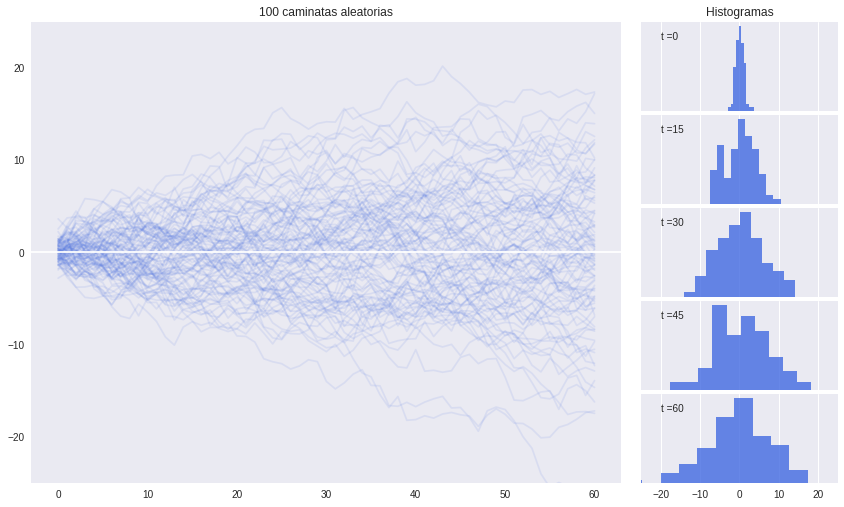

In [2]:
plt.style.use('seaborn-dark')
pd.options.plotting.backend = "matplotlib"

np.random.seed(2021)

T = 60 # horizonte
n = 100 # cantidad de simulaciones

𝜖 = pd.DataFrame(np.random.randn(T+1, n)) # ruido blanco
y = 𝜖.cumsum(axis=0)  # caminatas aleatorias


fig = plt.figure(figsize=(14, 8))
gs = fig.add_gridspec(5, 2,  width_ratios=(6, 2),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)

# -----------Graficar las simulaciones
ax = fig.add_subplot(gs[:, 0])
y.plot(color='RoyalBlue', alpha=0.1, legend=False, ax=ax)
ax.axhline(0, color='white');
ax.set(title=f'{n} caminatas aleatorias',ylim=[-25,25])

# -----------Histogramas
ax_last = None
for i in range(5):
    ax_last = fig.add_subplot(gs[i, 1], sharex= ax_last)
    y.loc[15*i].hist(ax=ax_last, color='RoyalBlue', alpha=0.8)
    if i==0:
        ax_last.set(title='Histogramas',xlim=[-25,25])

    ax_last.set_yticks([])
    ax_last.annotate(f't ={15*i}', (0.1, 0.8), xycoords='axes fraction')

{{ termina_ejemplo }}

## Caminata aleatoria con deriva

El proceso de caminata aleatoria con deriva es similar a la caminata aleatoria: \vspace{0.5em}

```{admonition} caminata aleatoria con deriva
\begin{align*}
	\Delta y_t &= a +\epsilon_{t} &\text{o bien }\quad y_t &= a +y_{t-1} + \epsilon_{t}
\end{align*}
```

Integrando el proceso sabemos que
\begin{equation*}
y_t = y_0 + at + \sum_{\tau=1}^t \epsilon_{\tau}
\end{equation*}

Vemos que la caminata aleatoria con deriva le añade una tendencia lineal determinística $at$ a la caminata aleatoria convencional $y_0 +\sum_{\tau=1}^s \epsilon_{t+\tau}$

Este es un ejemplo de un modelo de tendencia puro: no tiene un componente estacionario.


Sabemos que añadir un componente determinístico a una variable aleatoria cambia su media en la misma magnitud de ese componente, pero no alterna su varianza. Entonces, para la caminata aleatoria con deriva:
\begin{align*}
\E y_t &= y_0 + at &
\Cov\left(y_t, y_{t-s}\right) &= (t-s)\sigma^2 \\
\Var y_t &= t\sigma^2 &
\rho_{t,s} &= \sqrt{1-\frac{s}{t}}
\end{align*}

In [3]:
pd.options.plotting.backend = "plotly"
def rw_rho(t, smax=20):
    """
    Calcula las primera autocorrelaciones de una serie con raiz unitaria
    """
    return np.sqrt(1 - np.arange(smax+1) /t)

rw_rho_data = pd.DataFrame({f't={t}':rw_rho(t) for t in [20,40,60,80]})

rw_rho_data.plot().update_layout(
    title="Autocorrelaciones",
    xaxis_title="Rezagos",
    yaxis_title=r"$\rho$",
)


{{ empieza_ejemplo }} Simulaciones de caminatas aleatorias con deriva {{ fin_titulo_ejemplo }}
En esta figura se presentan 100 simulaciones de caminatas aleatorias
\begin{align*}
y_t &= 0.5 + y_{t-1} + \epsilon_{t}
\end{align*}

partiendo de $y_{-1}=0$ y asuminedo $\epsilon \sim N(0,1)$.

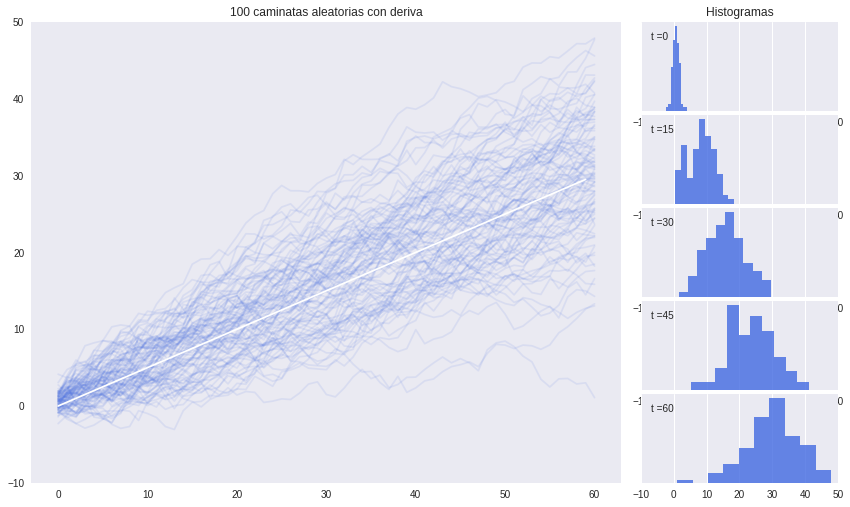

In [4]:
pd.options.plotting.backend = "matplotlib"
a = 0.5 # deriva
y = (𝜖+a).cumsum(axis=0)  # caminatas aleatorias con deriva


fig = plt.figure(figsize=(14, 8))
gs = fig.add_gridspec(5, 2,  width_ratios=(6, 2),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)

ax = fig.add_subplot(gs[:, 0])
y.plot(color='RoyalBlue', alpha=0.1, legend=False, ax=ax)
ax.plot(a*np.arange(T), color='white');
ax.set(title=f'{n} caminatas aleatorias con deriva',ylim=[-10,50])

ax_last = None
for i in range(5):
    ax_last = fig.add_subplot(gs[i, 1], sharex= ax_last)
    y.loc[15*i].hist(ax=ax_last, color='RoyalBlue', alpha=0.8)
    if i==0:
        ax_last.set(title='Histogramas',xlim=[-10,50])

    ax_last.set_yticks([])
    ax_last.annotate(f't ={15*i}', (0.05, 0.8), xycoords='axes fraction')

{{ termina_ejemplo }}



## Pronosticando una caminata aleatoria

Es sumamente difícil pronosticar una caminata aleatoria. Supongamos que tenemos datos hasta $t$ y deseamos pronostica el valor de la serie en $t+k$. En este caso:
\begin{align*}
\E\left[y_{t+k}\;|y_t\right] &= y_t &
\Var\left[y_{t+k}\;|y_t\right] &= k\sigma^2
\end{align*}

Es decir, el mejor pronostico para cualquier valor futuro de la serie es su valor observado más reciente.

Pero la varianza de este pronóstico crece linealmente, resultando infinitamente grande conforme $k\to\infty$.



## Series estacionarias en diferencia (DS)

Las caminatas aleatorias (con o sin deriva) son ejemplos de series **{estacionarias en diferencia**.

Esto quiere decir que si tomamos su primera diferencia, el resultado es una serie estacionaria:
\begin{align*}
  y_t     &= y_0 + at + \epsilon_1 + \dots + \epsilon_{t-1} + \epsilon_t \\
  y_{t-1} &= y_0 + a(t-1) + \epsilon_1 + \dots + \epsilon_{t-1} \\
\Rightarrow \Delta y_t &= a + \epsilon_t
\end{align*}

Por ello, decimos que la serie $y_t$ es **integrada de orden 1.

En general, si una serie $z_t$ debe ser diferenciada $d$ veces para obtener una serie estacionaria, entonces decimos que $z_t$ es **integrada de orden $d$**, escrito $I(d)$.





{{ empieza_ejemplo }} Correlación del PIB {{ fin_titulo_ejemplo }}

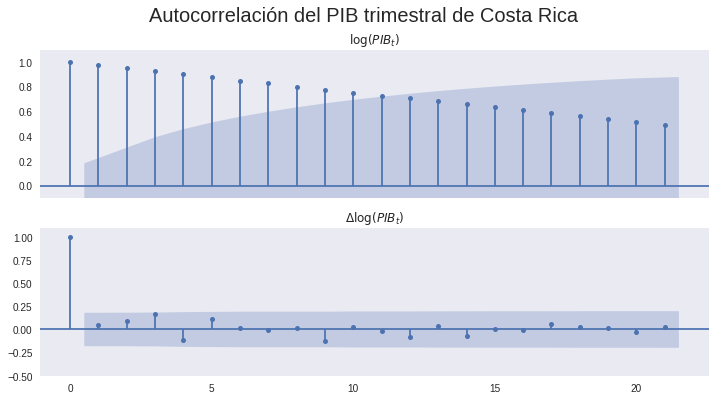

In [5]:
pd.options.plotting.backend = "plotly"
pib = bccr.SW({'33783':'PIB'})
pib['lPIB'] = np.log(pib['PIB'])

fig,axs = plt.subplots(2,1, sharex=True, figsize=[12,6])
sm.graphics.tsa.plot_acf(pib['lPIB'],ax=axs[0]);
axs[0].set(ylim=[-0.1,1.1], title='$\log(PIB_t)$')

sm.graphics.tsa.plot_acf(pib['lPIB'].diff().dropna(),ax=axs[1]);
axs[1].set(ylim=[-0.5,1.1], title='$\Delta\log(PIB_t)$')

fig.suptitle('Autocorrelación del PIB trimestral de Costa Rica', fontsize=20);

{{ termina_ejemplo }}